<a href="https://colab.research.google.com/github/saketvangara/Music/blob/master/Traffic_quality_status_weekly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
#@title End of the observed timeframe
report_end_date_input = "0401" #@param {type:"string"}
params = {
    'report_end_date': report_end_date_input
}
end_date = '20190401'

**Get display clicks and total clicks per day by shop**

In [16]:
%%bigquery --project stylight-bi-testing traffic_display_share --params $params

SELECT
  f.date,
  f.shop_id,
  SUM(f.clicks) AS total_clicks,
  SUM(g.clicks) AS display_clicks
FROM (
  SELECT
    a.dates AS date,
    a.product_uuid AS pid,
    b.shop_id AS shop_id,
    COUNT(*) AS clicks
  FROM (
    SELECT
      *,
      CAST(campaign AS int64) AS campaign_id,
      DATE(date) AS dates
    FROM
      `ranking-production.stats.ws_clickouts*` WHERE _TABLE_SUFFIX BETWEEN '20190320' AND CONCAT('2019',@report_end_date)) a
  JOIN (
    SELECT
      *,
      DATE(date) AS dates
    FROM
      `stylight-production.ranking.product_ranking_*` WHERE _TABLE_SUFFIX BETWEEN '20190320' AND CONCAT('2019', @report_end_date)) b
  ON
    a.product_uuid=b.product_id
    AND a.dates=b.dates
  LEFT JOIN
    `ranking-production.display_traffic.campaign_types_20190322` c
  ON
    a.campaign_id=c.campaign_id
  GROUP BY
    1,
    2,
    3) f
LEFT JOIN (
  SELECT
    a.dates AS date,
    a.product_uuid AS pid,
    b.shop_id AS shop_id,
    COUNT(*) AS clicks
  FROM (
    SELECT
      *,
      CAST(campaign AS int64) AS campaign_id,
      DATE(date) AS dates
    FROM
      `ranking-production.stats.ws_clickouts*`
    WHERE
      _TABLE_SUFFIX BETWEEN '20190320' AND CONCAT('2019',@report_end_date) and 
      campaign IN (
      SELECT
        CAST(campaign_id AS string)
      FROM
        `ranking-production.display_traffic.campaign_types_20190322`
      WHERE
        traffic_type IN ('display_page',
          'display_feed')) ) a
  JOIN (
    SELECT
      *,
      DATE(date) AS dates
    FROM
      `stylight-production.ranking.product_ranking_*` WHERE _TABLE_SUFFIX BETWEEN '20190320' AND CONCAT('2019', @report_end_date)) b
  ON
    a.product_uuid=b.product_id
    AND a.dates=b.dates
  GROUP BY
    1,
    2,
    3) g
ON
  f.shop_id=g.shop_id
  AND f.date=g.date
  and f.pid=g.pid
GROUP BY
  1,
  2

,date,shop_id,total_clicks,display_clicks
0,2019-03-25,3596,47,18.0
1,2019-03-23,8134,325,78.0
2,2019-03-29,8412,3,NaN
3,2019-03-20,9327,1,1.0
4,2019-03-29,8161,117,12.0
5,2019-03-23,4244,724,340.0
6,2019-03-20,3756,80,7.0
7,2019-03-30,4879,16,NaN
8,2019-03-30,6952,206,44.0
9,2019-03-22,7500,150,2.0


**Get 2% inequality metric per shop per day**

In [18]:
%%bigquery --project stylight-bi-testing traffic_ineq_share --params $params

SELECT
  DATE(date) AS date,
  shop_id,
  AVG(CAST((REGEXP_EXTRACT(log_report, 'Initial 2pr\\. metric: (\\d+\\.\\d+)')) AS float64)) as avg_di
FROM
  `ranking-production.display_traffic.shop_log_records_feed_traffic_dropped_products*` WHERE _TABLE_SUFFIX BETWEEN '20190320' AND CONCAT('2019', @report_end_date)
GROUP BY
  1,
  2

,date,shop_id,avg_di
0,2019-03-25,1304,0.330833
1,2019-03-25,9334,1.000000
2,2019-03-29,8412,1.000000
3,2019-03-22,8029,0.428350
4,2019-03-23,6546,0.345414
5,2019-03-26,9554,0.129191
6,2019-03-22,9510,0.296247
7,2019-03-24,5251,0.420066
8,2019-03-24,8172,0.094563
9,2019-04-01,4945,0.327381


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df1=pd.DataFrame(traffic_display_share)
df2=pd.DataFrame(traffic_ineq_share)

df3 = pd.merge(df1, df2,on=['shop_id','date'],how='left')
display(df3)

,date,shop_id,total_clicks,display_clicks,avg_di
0,2019-03-25,3596,47,18.0,0.067359
1,2019-03-23,8134,325,78.0,0.164555
2,2019-03-29,8412,3,NaN,1.000000
3,2019-03-20,9327,1,1.0,NaN
4,2019-03-29,8161,117,12.0,0.330712
5,2019-03-23,4244,724,340.0,0.207671
6,2019-03-20,3756,80,7.0,0.074380
7,2019-03-30,4879,16,NaN,0.142857
8,2019-03-30,6952,206,44.0,0.139283
9,2019-03-22,7500,150,2.0,0.359590


**Get week number for each date**

In [40]:
df3['date'] = df3['date'].astype('datetime64[ns]')
df3['Week_Number'] = df3['date'].dt.week
display(df3)

,date,shop_id,total_clicks,display_clicks,avg_di,display_share,Week_Number
0,2019-03-25,3596,47,18.0,0.067359,0.382979,13
1,2019-03-23,8134,325,78.0,0.164555,0.240000,12
2,2019-03-29,8412,3,NaN,1.000000,NaN,13
3,2019-03-20,9327,1,1.0,NaN,1.000000,12
4,2019-03-29,8161,117,12.0,0.330712,0.102564,13
5,2019-03-23,4244,724,340.0,0.207671,0.469613,12
6,2019-03-20,3756,80,7.0,0.074380,0.087500,12
7,2019-03-30,4879,16,NaN,0.142857,NaN,13
8,2019-03-30,6952,206,44.0,0.139283,0.213592,13
9,2019-03-22,7500,150,2.0,0.359590,0.013333,12


,Week_Number,unhealthy_shops
0,12,844
1,13,823
2,14,679


Text(0, 0.5, 'Number of unhealthy shops')

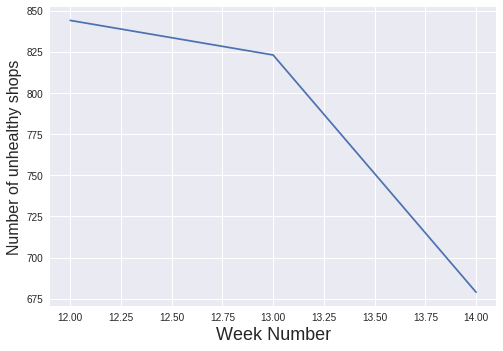

In [54]:
import pandasql as ps

query="""select Week_Number,sum(unhealthy) as unhealthy_shops from (select Week_Number,shop_id,case when displ_ineq=1 or spike_ineq=1 then 1 else 0 end as unhealthy from (select Week_Number,shop_id,case when sum(display_clicks)/sum(total_clicks) >0.15 then 1 else 0 end as displ_ineq, case when avg(avg_di) >0.3 then 1 else 0 end as spike_ineq from df3 group by Week_Number,shop_id order by Week_Number,shop_id)) group by Week_Number"""

df4=ps.sqldf(query, locals())
display(df4)
x=df4.Week_Number
y=df4.unhealthy_shops
plt.plot(x,y)
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Number of unhealthy shops', fontsize=16)